In [20]:
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib as mpl

In [21]:
file_path = "/home/mk/research/guam/jax_guam/"
traj = {"hover_to_cruise", "hover_to_rectangle", "sinusoidal"}
method = {"difftune", "autotune"}
tuned_param = {"alloc", "lqr", "alloc_lqr"}

In [56]:
def print_best_param(traj_type):
    np.set_printoptions(suppress=True)
    for m in method:
        for p in tuned_param:
            if m == "autotune":
                if p =="alloc_lqr":
                    print(m,p)
                    rmse_history = np.zeros((10,10))
                    for i in range(10):
                        current_path = os.path.join(file_path,m,traj_type,p,"rmse_history_"+str(i)+".npz")
                        rmse_history[i] = np.load(current_path)['arr_0']
                    rmse_best_idx = np.unravel_index(np.argmin(rmse_history, axis=None), rmse_history.shape)[0]
                    # print(rmse_best_idx)
                    current_path = os.path.join(file_path,m,traj_type,p,"Best_param_"+str(rmse_best_idx)+".npz")
                    param = np.load(current_path,allow_pickle=True)['arr_0'].item() 
                    Q_lon = param['lqr']['Q_lon']
                    Q_lat = param['lqr']['Q_lat']
                    R_lon = param['lqr']['R_lon']
                    R_lat = param['lqr']['R_lat']
                    W_lon = param['baseline_alloc']['W_lon']
                    W_lat = param['baseline_alloc']['W_lat']
                    print("W_lon: ", W_lon)
                    print("W_lat: ", W_lat)
                    print("Q_lon: ", Q_lon)
                    print("Q_lat: ", Q_lat)
                    print("R_lon: ", R_lon)
                    print("R_lat: ", R_lat)
            else:
                current_path = os.path.join(file_path,m,traj_type,p,"Best_param.npz")
                param = np.load(current_path,allow_pickle=True)['arr_0'].item() 
                print(m,p)
                if p =="lqr":
                    pass
                    Q_lon = param['lqr']['Q_lon']
                    Q_lat = param['lqr']['Q_lat']
                    R_lon = param['lqr']['R_lon']
                    R_lat = param['lqr']['R_lat']
                    print("Q_lon: ", Q_lon)
                    print("Q_lat: ", Q_lat)
                    print("R_lon: ", R_lon)
                    print("R_lat: ", R_lat)
                if p =="alloc_lqr":
                    W_lon = param['baseline_alloc']['W_lon']
                    W_lat = param['baseline_alloc']['W_lat']
                    Q_lon = param['lqr']['Q_lon']
                    Q_lat = param['lqr']['Q_lat']
                    R_lon = param['lqr']['R_lon']
                    R_lat = param['lqr']['R_lat']
                    print("W_lon: ", W_lon)
                    print("W_lat: ", W_lat)
                    print("Q_lon: ", Q_lon)
                    print("Q_lat: ", Q_lat)
                    print("R_lon: ", R_lon)
                    print("R_lat: ", R_lat)

In [22]:
def print_param(traj_type):
    np.set_printoptions(suppress=True)
    for m in method:
        for p in tuned_param:
            if m == "autotune":
                print(m,p)
                if p =="lqr":
                        pass
                        Q_lon = np.zeros((10,3))
                        Q_lat = np.zeros((10,3))
                        R_lon = np.zeros((10,3))
                        R_lat = np.zeros((10,3))
                        for i in range(10):
                            current_path = os.path.join(file_path,m,traj_type,p,"Best_param_"+str(i)+".npz")
                            param = np.load(current_path,allow_pickle=True)['arr_0'].item() 
                            Q_lon[i] = param['lqr']['Q_lon']
                            Q_lat[i] = param['lqr']['Q_lat']
                            R_lon[i] = param['lqr']['R_lon']
                            R_lat[i] = param['lqr']['R_lat']
                        print("Q_lon: ", np.mean(Q_lon,axis=0), np.std(Q_lon,axis=0))
                        print("Q_lat: ", np.mean(Q_lat,axis=0), np.std(Q_lat,axis=0))
                        print("R_lon: ", np.mean(R_lon,axis=0), np.std(R_lon,axis=0))
                        print("R_lat: ", np.mean(R_lat,axis=0), np.std(R_lat,axis=0))

                if p =="alloc":
                        pass
                        W_lon = np.zeros((10,12))
                        W_lat = np.zeros((10,11))
                        for i in range(10):
                            current_path = os.path.join(file_path,m,traj_type,p,"Best_param_"+str(i)+".npz")
                            param = np.load(current_path,allow_pickle=True)['arr_0'].item() 
                            W_lon[i] = param['baseline_alloc']['W_lon']
                            W_lat[i] = param['baseline_alloc']['W_lat']
                        print("W_lon: ", np.mean(W_lon,axis=0), np.std(W_lon,axis=0))
                        print("W_lat: ", np.mean(W_lat,axis=0), np.std(W_lat,axis=0))
                if p =="alloc_lqr":
                        Q_lon = np.zeros((10,3))
                        Q_lat = np.zeros((10,3))
                        R_lon = np.zeros((10,3))
                        R_lat = np.zeros((10,3))
                        W_lon = np.zeros((10,12))
                        W_lat = np.zeros((10,11))
                        for i in range(10):
                            current_path = os.path.join(file_path,m,traj_type,p,"Best_param_"+str(i)+".npz")
                            param = np.load(current_path,allow_pickle=True)['arr_0'].item() 
                            Q_lon[i] = param['lqr']['Q_lon']
                            Q_lat[i] = param['lqr']['Q_lat']
                            R_lon[i] = param['lqr']['R_lon']
                            R_lat[i] = param['lqr']['R_lat']
                            W_lon[i] = param['baseline_alloc']['W_lon']
                            W_lat[i] = param['baseline_alloc']['W_lat']
                        print("W_lon: ", np.mean(W_lon,axis=0), np.std(W_lon,axis=0))
                        print("W_lat: ", np.mean(W_lat,axis=0), np.std(W_lat,axis=0))
                        print("Q_lon: ", np.mean(Q_lon,axis=0), np.std(Q_lon,axis=0))
                        print("Q_lat: ", np.mean(Q_lat,axis=0), np.std(Q_lat,axis=0))
                        print("R_lon: ", np.mean(R_lon,axis=0), np.std(R_lon,axis=0))
                        print("R_lat: ", np.mean(R_lat,axis=0), np.std(R_lat,axis=0))
            else:
                current_path = os.path.join(file_path,m,traj_type,p,"Best_param.npz")
                param = np.load(current_path,allow_pickle=True)['arr_0'].item() 
                print(m,p)
                if p =="lqr":
                    pass
                    Q_lon = param['lqr']['Q_lon']
                    Q_lat = param['lqr']['Q_lat']
                    R_lon = param['lqr']['R_lon']
                    R_lat = param['lqr']['R_lat']
                    print("Q_lon: ", Q_lon)
                    print("Q_lat: ", Q_lat)
                    print("R_lon: ", R_lon)
                    print("R_lat: ", R_lat)
                if p =="alloc":
                    pass
                    W_lon = param['baseline_alloc']['W_lon']
                    W_lat = param['baseline_alloc']['W_lat']
                    print("W_lon: ", W_lon)
                    print("W_lat: ", W_lat)
                if p =="alloc_lqr":
                    W_lon = param['baseline_alloc']['W_lon']
                    W_lat = param['baseline_alloc']['W_lat']
                    Q_lon = param['lqr']['Q_lon']
                    Q_lat = param['lqr']['Q_lat']
                    R_lon = param['lqr']['R_lon']
                    R_lat = param['lqr']['R_lat']
                    print("W_lon: ", W_lon)
                    print("W_lat: ", W_lat)
                    print("Q_lon: ", Q_lon)
                    print("Q_lat: ", Q_lat)
                    print("R_lon: ", R_lon)
                    print("R_lat: ", R_lat)

In [23]:
def plot_rmse(method, tuned_param, rmse_history):
    if method == 'autotune':
        m = "AutoTune"
    else:
        m = "DiffTune"
    if tuned_param == "alloc":
        label = m + "(W only)"
        color = "red"
    elif tuned_param == "lqr":
        label = m + "(Q and R only)"
        color = "green"
    else:
        label = m
        color = "blue"


    if method == "autotune":
        mean_rmse = np.mean(rmse_history, axis=0)
        min_rmse = np.min(rmse_history, axis=0)
        max_rmse = np.max(rmse_history, axis=0)
        # Plotting the mean RMSE with shaded area for min and max
        iterations = np.arange(0, rmse_history.shape[1])
        plt.plot(iterations, mean_rmse, label=label, color = color,linewidth=2, linestyle = "--")
        plt.fill_between(iterations, min_rmse, max_rmse, color=color, alpha=0.2)
        print(np.mean(rmse_history[:,-1]),np.std(rmse_history[:,-1]))
    else:
        plt.plot(rmse_history, label=label,color=color)
        print(rmse_history)

## Sinusoidal

[2.6435733  0.38465235 0.3693887  0.36581472 0.36306098 0.3606676
 0.35874438 0.35697883 0.35545367 0.35406095]
[2.6435733  0.26199487 0.22112034 0.22060843 0.2201032  0.21959926
 0.21909545 0.21859872 0.21809524 0.21759088]
[2.6435733 2.492725  2.3553238 2.226718  2.1124146 2.017528  1.9584486
 1.9285084 1.9081526 1.8894863]
2.499678486585617 1.1897868730810408
1.9727338060736657 1.2861568644693842
2.636184334754944 0.11308592188451462


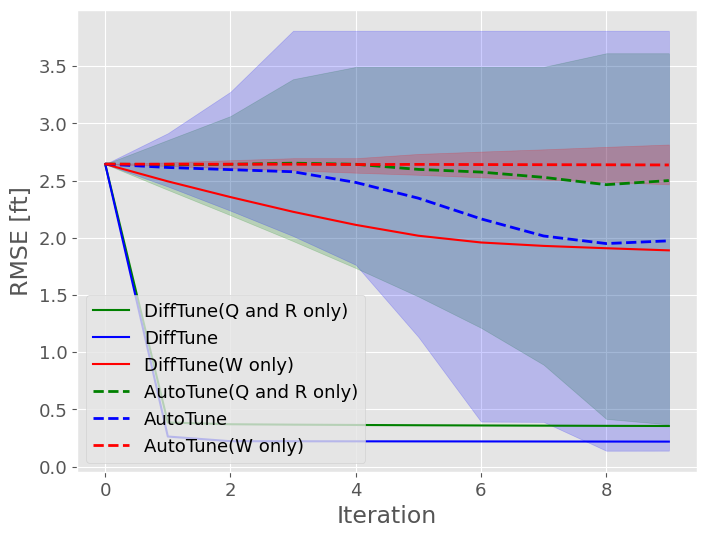

In [27]:
plt.figure(figsize=(8, 6)) 
for m in method:
    for p in tuned_param:
        if m == "autotune":
            # pass
            rmse_history = np.zeros((10,10))
            for i in range(10):
                current_path = os.path.join(file_path,m,"sinusoidal",p,"rmse_history_"+str(i)+".npz")
                rmse_history[i] = np.load(current_path)['arr_0']
    
        else:
            current_path = os.path.join(file_path,m,"sinusoidal",p,"rmse_history.npz")
            rmse_history = np.load(current_path)['arr_0']
        plot_rmse(m, p, rmse_history)

mpl.rcParams["font.size"] = 13
plt.xlabel("Iteration", fontsize=17)
plt.ylabel("RMSE [ft]", fontsize=17)
plt.legend()
plt.show()

In [32]:
print_param("sinusoidal")

difftune lqr
Q_lon:  [   0.10081506    1.0578135  1000.        ]
Q_lat:  [   0.04295576 1000.         1000.        ]
R_lon:  [0.99662966 0.98002744 0.9935652 ]
R_lat:  [0.9992844 1.0000008 1.0000759]
difftune alloc_lqr
W_lon:  [1.0028788 1.0133023 0.989292  0.9998118 0.9979115 0.9788539 1.0179595
 0.9993483 1.        1.0018728 0.9983071 1.       ]
W_lat:  [0.9998644  1.0003853  0.999545   1.0001317  1.0001909  0.99961704
 1.000334   0.999806   0.9999962  1.0001307  0.99999964]
Q_lon:  [   0.288603     5.2070704 1000.       ]
Q_lat:  [   0.14233072 1000.         1000.        ]
R_lon:  [0.99832463 0.93231076 0.96059406]
R_lat:  [0.9982978 1.0000463 1.0003388]
difftune alloc
W_lon:  [1.0544493  1.3193281  0.73455495 1.1550434  0.9339527  0.5817075
 1.1255127  0.9709172  1.         1.0904139  0.8561328  1.0000004 ]
W_lat:  [1.120959   1.034528   0.97654194 0.83317816 1.1082366  1.0806756
 0.9357429  0.86935556 1.0004619  1.0040624  0.9999996 ]
autotune lqr
Q_lon:  [   0.0101042     0.01300

In [57]:
print_best_param("sinusoidal")

difftune lqr
Q_lon:  [   0.10081506    1.0578135  1000.        ]
Q_lat:  [   0.04295576 1000.         1000.        ]
R_lon:  [0.99662966 0.98002744 0.9935652 ]
R_lat:  [0.9992844 1.0000008 1.0000759]
difftune alloc_lqr
W_lon:  [1.0028788 1.0133023 0.989292  0.9998118 0.9979115 0.9788539 1.0179595
 0.9993483 1.        1.0018728 0.9983071 1.       ]
W_lat:  [0.9998644  1.0003853  0.999545   1.0001317  1.0001909  0.99961704
 1.000334   0.999806   0.9999962  1.0001307  0.99999964]
Q_lon:  [   0.288603     5.2070704 1000.       ]
Q_lat:  [   0.14233072 1000.         1000.        ]
R_lon:  [0.99832463 0.93231076 0.96059406]
R_lat:  [0.9982978 1.0000463 1.0003388]
difftune alloc
autotune alloc_lqr
W_lon:  [0.8959503 1.0934315 1.0259619 0.9438944 1.0758286 0.9478264 1.0842772
 0.9897156 0.8525014 1.0867138 0.9838557 1.0022678]
W_lat:  [1.0176897 0.9671488 0.9264207 1.0166416 1.0051794 1.0656271 1.1131506
 1.0667934 0.869123  1.062213  1.0815601]
Q_lon:  [   0.011858      0.00633145 1068.0352  

## Hover-to-Cruise

[28.884083 18.425991 18.395605 18.367369 18.341164 18.316778 18.29383
 18.272198 18.251661 18.232319]
[28.884083 16.76155  16.667843 16.638235 16.612116 16.588957 16.567484
 16.547413 16.5286   16.510939]
[28.884083 25.60488  27.902037 23.647    23.140533 23.00701  22.994795
 23.000454 22.972548 22.963823]
27.59851417541504 3.7538653012216074
26.494583320617675 4.324864705158181
29.166803550720214 0.32504804053740727


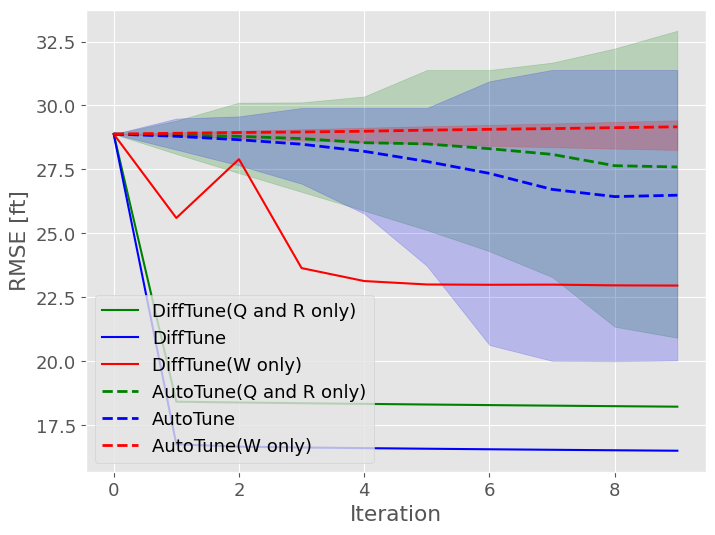

In [58]:
plt.figure(figsize=(8, 6)) 
for m in method:
    for p in tuned_param:
        if m == "autotune":
            rmse_history = np.zeros((10,10))
            for i in range(10):
                current_path = os.path.join(file_path,m,"hover_to_cruise",p,"rmse_history_"+str(i)+".npz")
                rmse_history[i] = np.load(current_path)['arr_0']
            plot_rmse(m, p, rmse_history)
            
        else:
            current_path = os.path.join(file_path,m,"hover_to_cruise",p,"rmse_history.npz")
            rmse_history = np.load(current_path)['arr_0']
            plot_rmse(m, p, rmse_history)

plt.xlabel("Iteration")
plt.ylabel("RMSE [ft]")
plt.legend()
plt.show()

In [35]:
print_param("hover_to_cruise")

difftune lqr
Q_lon:  [   0.1886647     0.39297512 1000.        ]
Q_lat:  [   0.00978566 1000.         1000.        ]
R_lon:  [0.99205613 0.98956597 0.999992  ]
R_lat:  [1.0000023 1.0000001 1.0000067]
difftune alloc_lqr
W_lon:  [1.3060788  1.4206848  1.2633967  1.3547149  0.57907164 0.6353562
 0.6017596  0.5945578  1.         1.4989206  0.8416728  1.0000125 ]
W_lat:  [1.0020705  0.9872427  1.0142338  0.9978945  0.996437   1.0015838
 0.99831724 1.0036764  1.0001271  0.99829805 1.0000054 ]
Q_lon:  [   0.19030164    0.38496232 1000.        ]
Q_lat:  [   0.00933529 1000.         1000.        ]
R_lon:  [0.99175256 0.9926942  1.0000125 ]
R_lat:  [1.0000069 1.0000018 1.0000048]
difftune alloc
W_lon:  [1.3453449  1.5120293  1.2493938  1.4022814  0.631775   0.694165
 0.6080897  0.61667585 1.         1.7538226  1.4863876  1.0000056 ]
W_lat:  [1.033273   0.89419556 1.0943677  0.96729827 1.0061179  0.9779299
 0.9993553  0.9900079  1.0057341  1.023166   0.9999642 ]
autotune lqr
Q_lon:  [   0.0101042

[51.063152 36.298496 35.771233 36.084343 35.338276 34.863266 35.004494
 34.663494 35.109787 34.43942 ]
[51.063152 33.589973 32.375267 33.73568  32.951885 32.530758 32.09931
 31.551733 30.74859  30.310293]
[51.063152 48.157074 46.43412  45.560234 45.066116 44.8431   44.778854
 44.76594  44.753864 44.764416]
49.290083694458005 4.395354026276234
46.87989959716797 4.456936515591349
51.66989440917969 0.5480995477008431


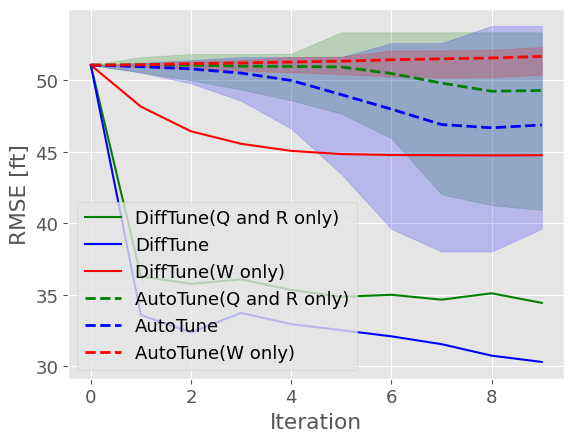

In [31]:
for m in method:
    for p in tuned_param:
        if m == "autotune":
            # if p != "alloc":
            rmse_history = np.zeros((10,10))
            for i in range(10):
                current_path = os.path.join(file_path,m,"hover_to_rectangle",p,"rmse_history_"+str(i)+".npz")
                rmse_history[i] = np.load(current_path)['arr_0']
        # else:
        #     current_path = os.path.join(file_path,m,"hover_to_rectangle",p,"rmse_history.npz")
        #     rmse_history = np.load(current_path)['arr_0']
            plot_rmse(m, p, rmse_history)
            # print(rmse_history[0])
        else:
            # if p =="lqr":
            #     continue
            current_path = os.path.join(file_path,m,"hover_to_rectangle",p,"rmse_history.npz")
            rmse_history = np.load(current_path)['arr_0']
            plot_rmse(m, p, rmse_history)
plt.xlabel("Iteration")
plt.ylabel("RMSE [ft]")
plt.legend()
plt.show()

In [34]:
print_param("hover_to_rectangle")

difftune lqr
Q_lon:  [   0.001         0.06556412 1000.        ]
Q_lat:  [   0.00624426 1000.         1000.        ]
R_lon:  [1.00209    0.99810547 1.0002726 ]
R_lat:  [1.0003897 0.9999998 0.9999846]
difftune alloc_lqr
W_lon:  [1.2034407  1.2070447  1.1628478  1.1567961  0.73734206 0.72905415
 0.8837634  0.85759056 1.         1.132422   0.788208   1.        ]
W_lat:  [1.0028756  1.0017515  0.99788356 0.99461526 1.0016761  1.0009505
 0.999577   0.99447167 1.0071093  0.999144   1.0000005 ]
Q_lon:  [   0.001         0.02340985 1000.        ]
Q_lat:  [   0.03434857 1000.         1000.        ]
R_lon:  [1.0038135  0.99978316 1.0003289 ]
R_lat:  [1.0008374 0.9999894 0.9999738]
difftune alloc
W_lon:  [1.1875265  1.1946548  1.1571175  1.1539944  0.7659277  0.72028476
 0.89498186 0.8259318  1.         1.1535523  0.8040464  0.99999416]
W_lat:  [1.0036539  1.0033169  0.9947308  0.9928787  1.0034983  1.0000367
 0.99994725 0.9915194  1.0086145  1.001651   1.0000019 ]
autotune lqr
Q_lon:  [   0.0091